In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import ticker, cm
import calendar
import os
from loguru import logger
from mpl_toolkits.basemap import Basemap

min_lon = -10
max_lon = 30
upper_lat = -55
lower_lat = -30

# the average of temperature data

In [2]:
base_path = './dataset/'
history_dataset = []
all_history_dataset_files_ = os.listdir(base_path)

example = "GEOS.fp.asm.inst1_2d_lfo_Nx.20160101_1400.V01.nc4"

years = [2016, 2017, 2018, 2019, 2020]
all_history_dataset_files = []
for y in years:
    for m in range(6, 7):
        monthRange = calendar.monthrange(y,m+1)
        for d in range(monthRange[1]):
            all_history_dataset_files.append(f"GEOS.fp.asm.inst1_2d_lfo_Nx.{y}{str(m+1).zfill(2)}{str(d+1).zfill(2)}_1400.V01.nc4")

for f in all_history_dataset_files:
    logger.info(f"{f}")
history_dataset_objs = [netCDF4.Dataset(base_path + file_path) for file_path in all_history_dataset_files]
logger.info(f"the number of files: {len(all_history_dataset_files)}")

2023-08-16 16:48:22.318 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160701_1400.V01.nc4
2023-08-16 16:48:22.319 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160702_1400.V01.nc4
2023-08-16 16:48:22.321 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160703_1400.V01.nc4
2023-08-16 16:48:22.322 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160704_1400.V01.nc4
2023-08-16 16:48:22.323 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160705_1400.V01.nc4
2023-08-16 16:48:22.325 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160706_1400.V01.nc4
2023-08-16 16:48:22.326 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160707_1400.V01.nc4
2023-08-16 16:48:22.330 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160708_1400.V01.nc4
2023-08-16 16:48:22.332 | INFO     | __main__:<module>:16 - GEOS.fp.asm.inst1_2d_lfo_Nx.20160709_1400.V01.nc4
2023-08-16

In [3]:
# get mean of all data
all_temp_arrays = []
for nc4_obj in history_dataset_objs:
    temp = nc4_obj.variables['TLML']
    all_temp_arrays.append(temp)
all_temp_arrays = np.array(all_temp_arrays)
temp_arrays = np.concatenate(all_temp_arrays)
mean = np.mean(temp_arrays, axis=0, keepdims=True)

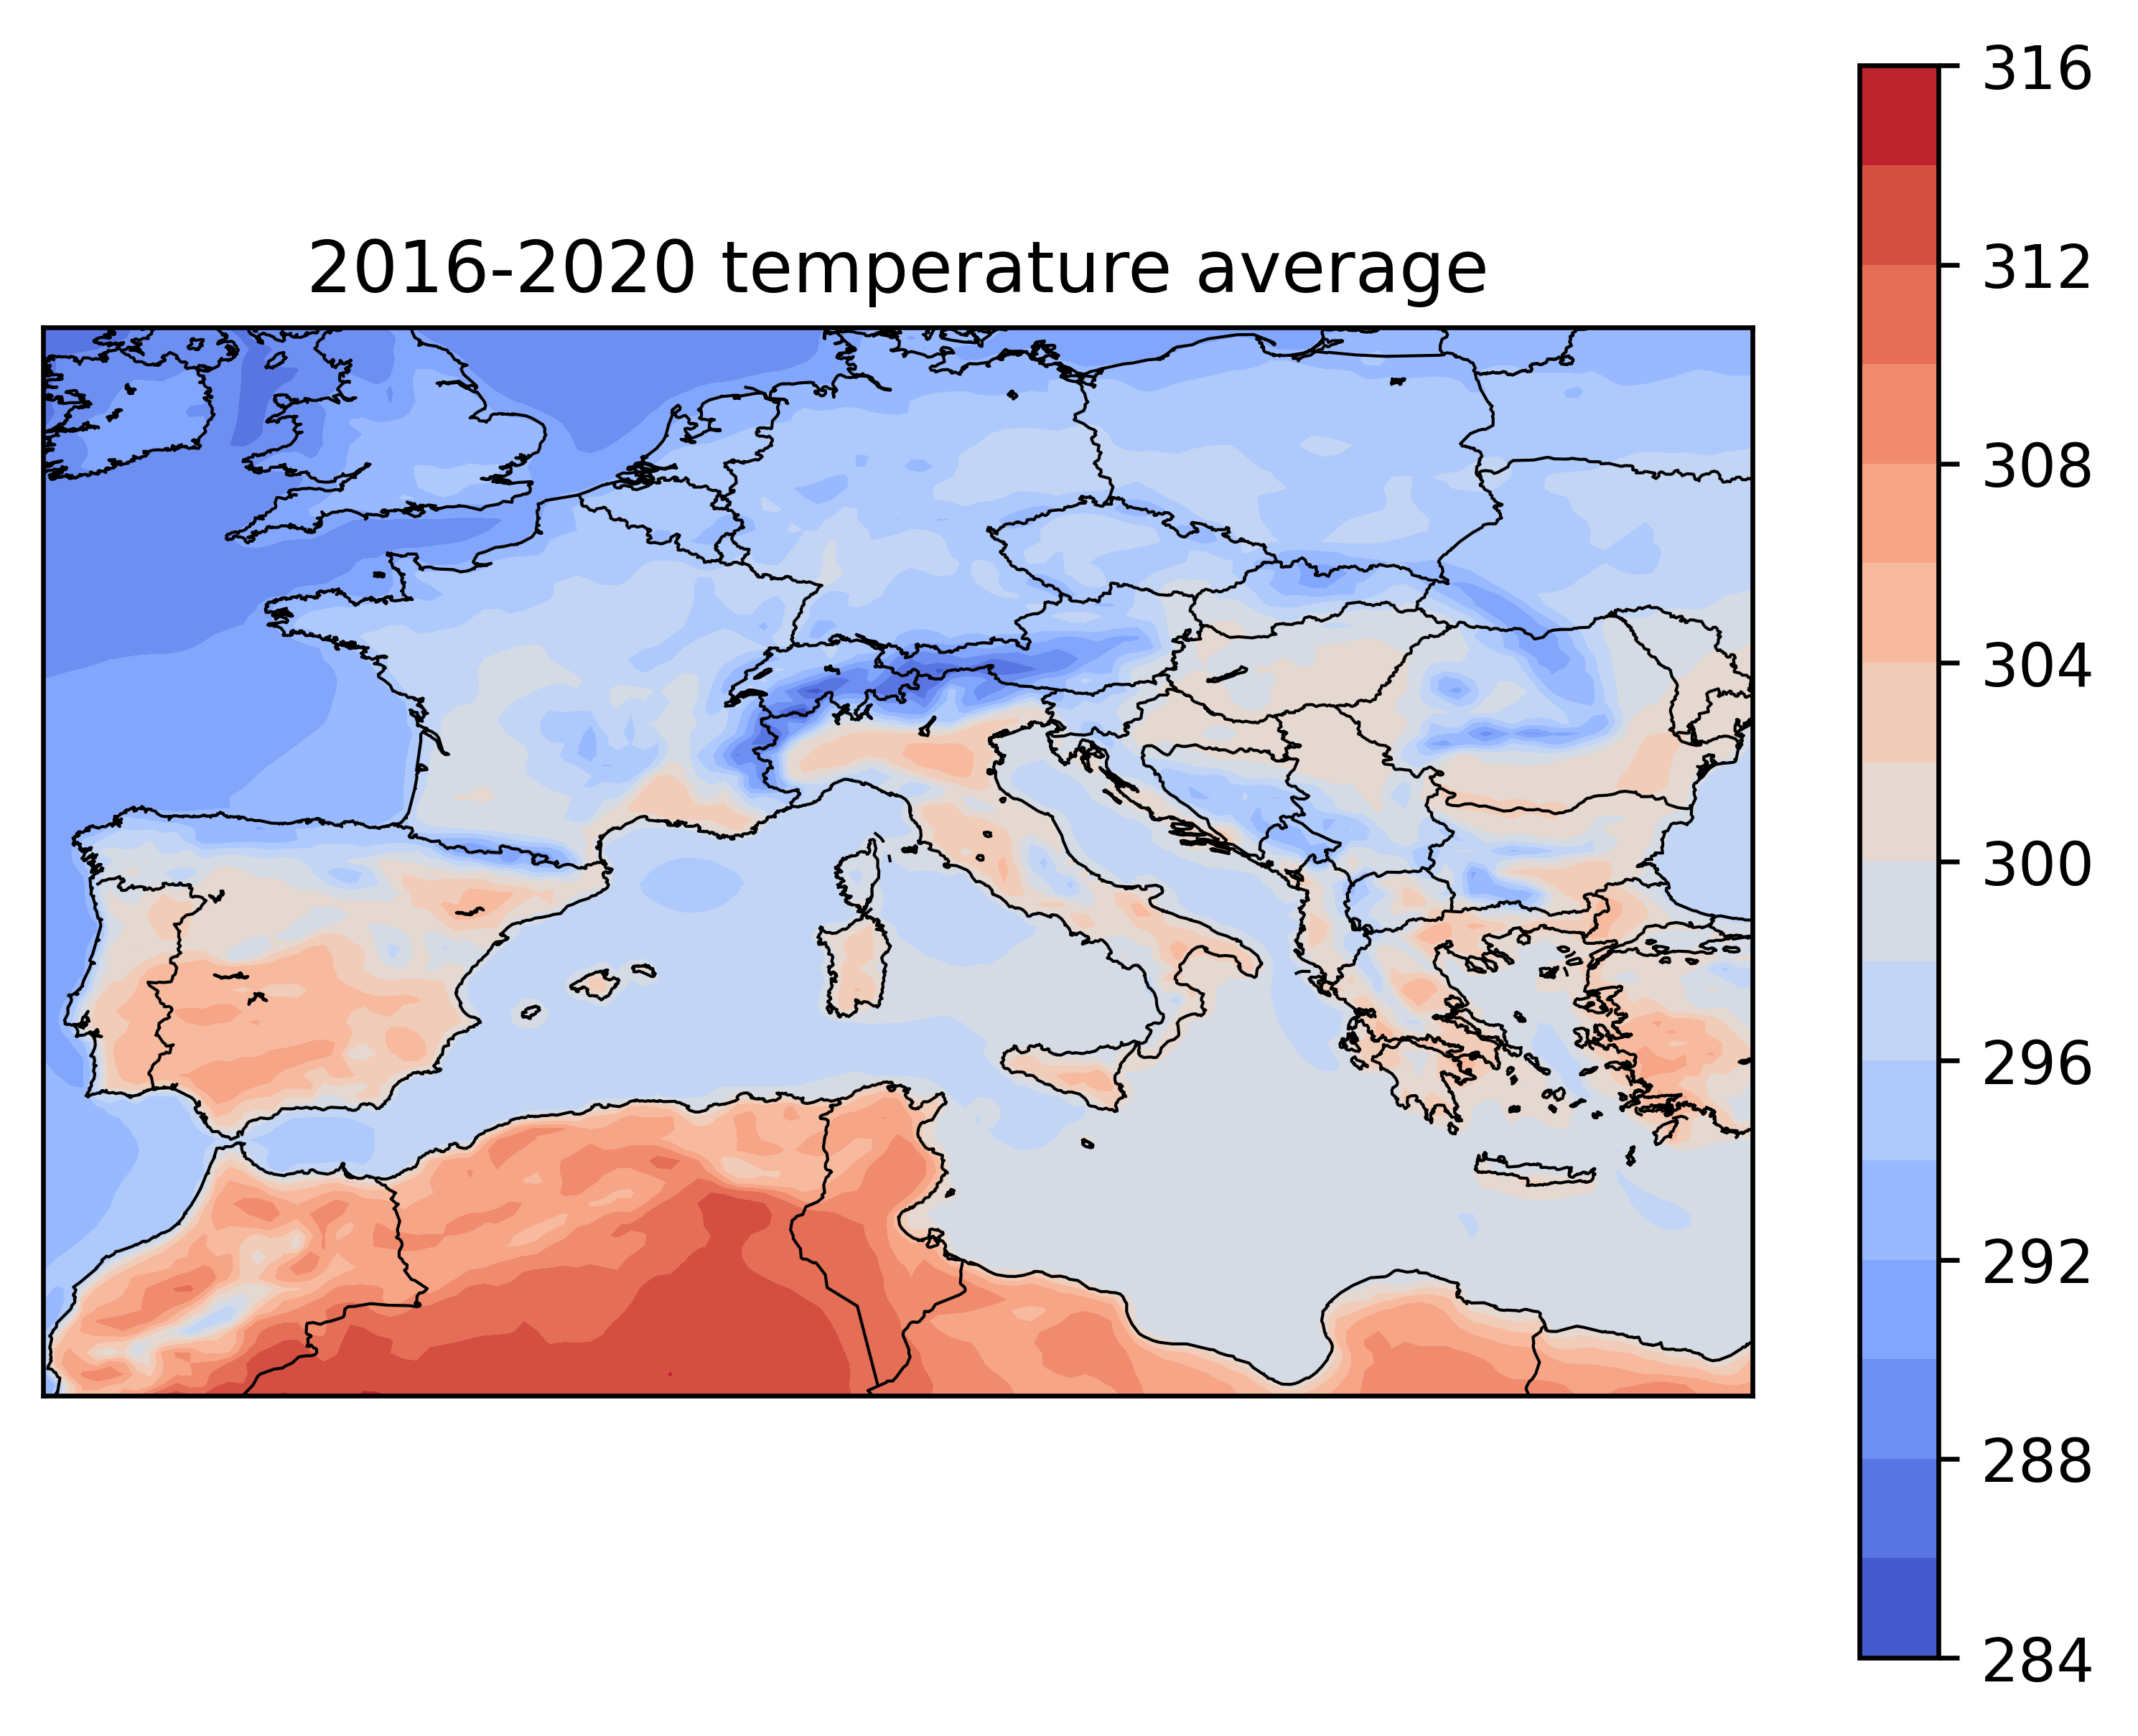

In [4]:
map = Basemap(resolution='i', llcrnrlat = -lower_lat, urcrnrlat = -upper_lat, llcrnrlon = min_lon, urcrnrlon = max_lon)
map.drawcoastlines(linewidth=0.5, antialiased=True)
map.drawcountries()
lons = history_dataset_objs[0].variables['lon']
lats = history_dataset_objs[0].variables['lat']

xx, yy = map(*np.meshgrid(lons, lats))

cs = map.contourf(xx, yy, mean[0], levels = 15, cmap='coolwarm')
plt.colorbar(cs)
plt.title("2016-2020 temperature average")
plt.show()

### 20230724

In [5]:
extreme_temp_file_path = './dataset/'
extreme_temp_files = ["GEOS.fp.asm.inst1_2d_lfo_Nx.20230725_1400.V01.nc4"]


extreme_temp_objs = []
for f in extreme_temp_files:
    extreme_temp_objs.append(netCDF4.Dataset(extreme_temp_file_path + f))

logger.info(f"the number of files: {len(extreme_temp_objs)}")

extreme_temp_arrays = []
for o in extreme_temp_objs:
    extreme_temp_arrays.append(o.variables['TLML'])
extreme_temp_arrays = np.array(extreme_temp_arrays)
extreme_temp_arrays = np.concatenate(extreme_temp_arrays)
mean_extreme_temp = np.mean(extreme_temp_arrays, axis=0, keepdims=True)

diff = mean_extreme_temp - mean


2023-08-16 16:48:33.774 | INFO     | __main__:<module>:9 - the number of files: 1


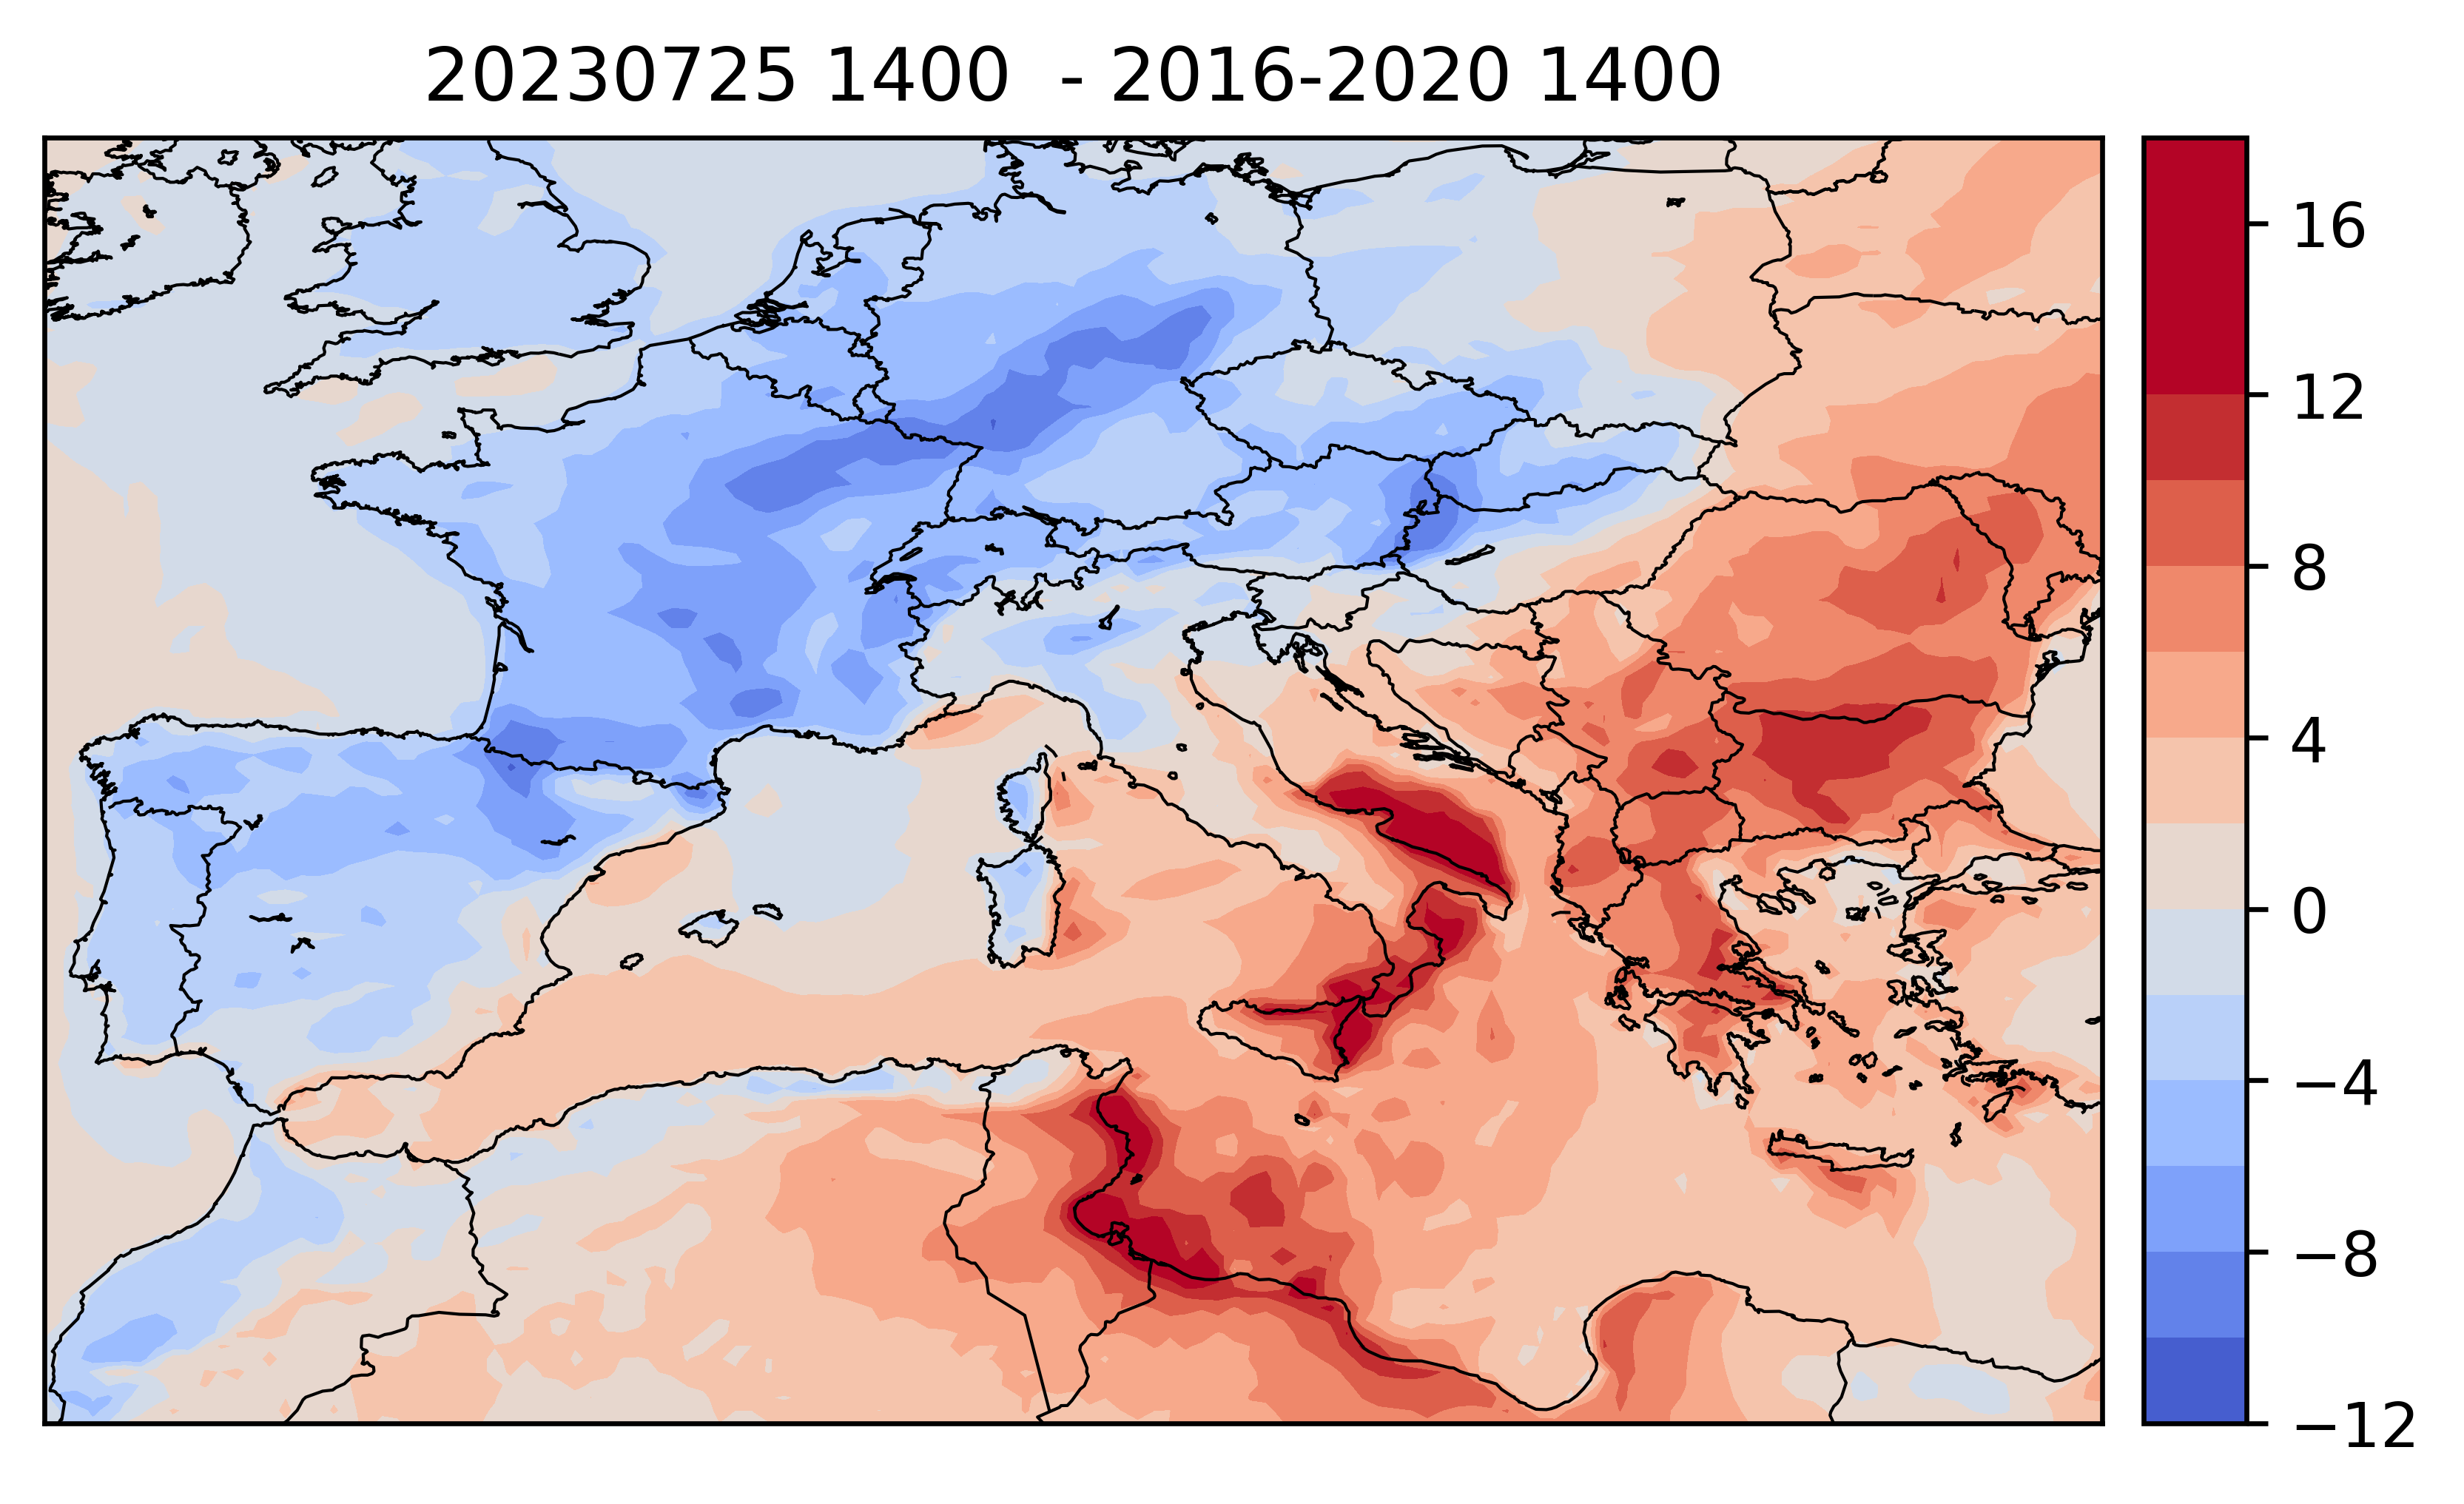

In [7]:
map = Basemap(resolution='i', llcrnrlat = -lower_lat, urcrnrlat = -upper_lat, llcrnrlon = min_lon, urcrnrlon = max_lon)

map.drawcoastlines(linewidth=0.5, antialiased=True)
map.drawcountries()
lons = extreme_temp_objs[0].variables['lon']
lats = extreme_temp_objs[0].variables['lat']

xx, yy = map(*np.meshgrid(lons, lats))

cs = map.contourf(xx, yy, diff[0], levels=15, vmax=12, cmap='coolwarm')
map.colorbar(cs)

plt.title("20230725 1400  - 2016-2020 1400")

plt.show()